In [ ]:
"""
1.)Generate three networks with 1000 nodes which have power-law degree distribution with
degree exponent γ = 2.2. Write R script or Python script, study and visualize the
robustness of the three networks against random failures, and compare their 𝑃∞(𝑓)/𝑃∞(0)
ratio. Which network is most robust? Explain
"""

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

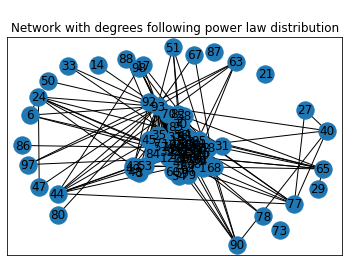

In [5]:
#Network with degrees following power law distribution
n = 100         #No of nodes
power_law_exponent = 2.2    
s1 = nx.utils.powerlaw_sequence(n , power_law_exponent)      
G = nx.expected_degree_graph(s1, selfloops=False)
#pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)       #plotting the graph
plt.title("\nNetwork with degrees following power law distribution")
plt.show()



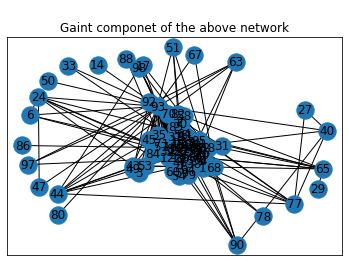

The size of the network is 100
Size of the gaint component 91


In [6]:

#Finding the graphs gaint component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
#Visualise the Gaint component of the network..
nx.draw_networkx(G0, pos)
plt.title("\nGaint componet of the above network")
plt.show()

y = len(G0)         #𝑃∞(𝑓)/𝑃∞(0)
print("The size of the network is", n)
print("Size of the gaint component",y)

In [7]:
def remove_random_node(g, n):
    for i in range(n):
        node = random.choice(list(g.nodes.keys()))
        g.remove_node(node)
        return g

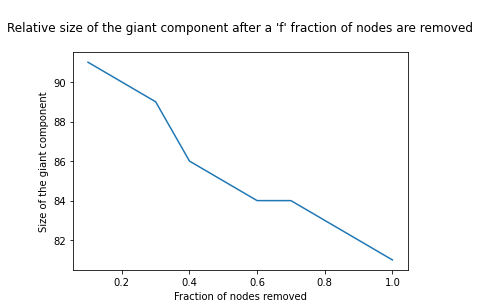

In [12]:
# Visualise the robustness of the network.. by removing fraction of nodes from the network..

n=100
power_law_exponent = 2.2    
s1 = nx.utils.powerlaw_sequence(n , power_law_exponent)      
G = nx.expected_degree_graph(s1, selfloops=False)

x=[]
y=[]
for i in range(1,11):
    g = remove_random_node(G,int((i/10)*n))
    Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
    G0 = g.subgraph(Gcc[0])
    yt = len(G0)         #𝑃∞(𝑓)/𝑃∞(0) Size of the gaint component
    y.append(yt)
    x.append((i/10))     #fraction of nodes removed...

plt.title("\nRelative size of the giant component after a 'f' fraction of nodes are removed\n")
plt.xlabel("Fraction of nodes removed")
plt.ylabel("Size of the giant component")#𝑃∞(𝑓)/𝑃∞(0)
plt.plot(x,y)
    


In [ ]:
#So amoung 3 network to find which network is more robust..we plot the 𝑃∞(𝑓)/𝑃∞(0) component with the fraction of nodes removed for 3 networks..

In [16]:
def robustness_plot(G):
    x=[]
    y=[]
    for i in range(1,11):
        g = remove_random_node(G,int((i/10)*n))
        Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
        G0 = g.subgraph(Gcc[0])
        yt = len(G0)         #𝑃∞(𝑓)/𝑃∞(0) Size of the gaint component
        y.append(yt)
        x.append((i/10))     #fraction of nodes removed...

    plt.plot(x,y)
    plt.xlabel("(f) Fraction of nodes removed")
    plt.ylabel("Size of the giant component")#𝑃∞(𝑓)/𝑃∞(0)
    plt.show()


	Network that follows powerlaw distribution n=100,exponent=2.2
	Relative size of the giant component after a (f)fraction of nodes are removed



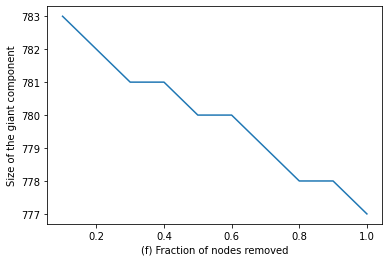

In [17]:
s1 = nx.utils.powerlaw_sequence(1000 , 2.2)    
G1 = nx.expected_degree_graph(s1, selfloops=False)
print("\tNetwork that follows powerlaw distribution n=100,exponent=2.2")
print("\tRelative size of the giant component after a (f)fraction of nodes are removed\n")
robustness_plot(G1)

	Network that follows powerlaw distribution n=100,exponent=2.1
	Relative size of the giant component after a f fraction of nodes are removed



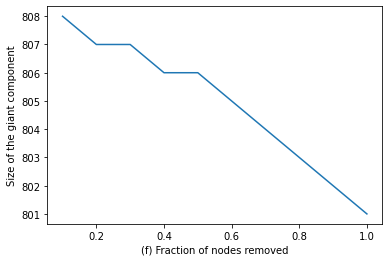

In [19]:
s2 = nx.utils.powerlaw_sequence(1000, 2.1)        
G2 = nx.expected_degree_graph(s2, selfloops=False)
print("\tNetwork that follows powerlaw distribution n=100,exponent=2.1")
print("\tRelative size of the giant component after a (f) fraction of nodes are removed\n")
robustness_plot(G2)

	Network that follows powerlaw distribution n=100,exponent=2.5
	Relative size of the giant component after a (f) fraction of nodes are removed



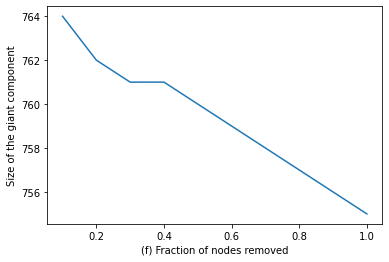

In [20]:
s3 = nx.utils.powerlaw_sequence(1000, 2.5)        
G3 = nx.expected_degree_graph(s3, selfloops=False)
print("\tNetwork that follows powerlaw distribution n=100,exponent=2.5")
print("\tRelative size of the giant component after a (f) fraction of nodes are removed\n")
robustness_plot(G3)